In [2]:
library(tidyverse)
library(rvest)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




# Lecture 11: Web scraping

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand how to import data from online sources by scraping web pages.
</div>

These notes correspond to Chapter 26 of your book.


## Ethics of scraping data online
You should carefully read [Section 26.2](https://r4ds.hadley.nz/webscraping.html#scraping-ethics-and-legalities) of the book concerning various ethical and legal issues surrounding scraping web sites for data. In this class we will only look at large, public web sites like Wikipedia and IMDB, where there is no risk of anything bad happening. However, there are other situations where it may be unethical, or even illegal, to harvest data from a website, even if you are technically able. **As data scientists in the real world, it will be up to you to carefully weigh these concerns before using the tools discussed in today's lecture.**

## Reading data from the Internet
These days, it's increasingly common to pull data from online sources. For example, say I wanted to know the population of European countries. This is [easily found](https://en.wikipedia.org/wiki/Demographics_of_Europe#Population_by_country) on Wikipedia. How can I get these data into R and analyze them?

## How do web pages work?

Web pages are written in a special language called HTML (**H**yper**t**ext **M**arkup **L**anguage). Here is a simple example of some HTML:

    <html>
    <head> 
      <title>Page title</title>
    </head>
    <body>
      <h1 id='first'>A heading</h1>
      <p>Some text &amp; <b>some bold text.</b></p>
      <img src='myimg.png' width='100' height='100'>
    </body>

Web scraping is possible because most web pages have a consistent, hierarchical structure. For example, if I asked you how to navigate to the title of the web page shown above, you would follow the "path"

    html > head > title
    
to arrive at "Page title".

## HTML elements

There are a lot of HTML elements that might contain interesting information. Here are a few of the most common:
- Block tags that denote sections of text: `<h1>` (heading), `<p>` (paragraph), `<ul>`/`<ol>` (un)ordered list, etc.
- `<table>` (a table), `<tr>` (a table row), `<td>` (a table cell), etc.
- Each of these elements can contain attributes such as `id=` or `class=`. For example, `<table id="movies">` is probably a table that contains movie information.

The `rvest` package is used to load a web page and extract elements and tables based on their HTML tags. Let's see how it works by scraping the Wikipedia page mentioned earlier:

In [257]:
library(rvest)
europop <- read_html("http://en.wikipedia.org/wiki/Demographics_of_Europe#Population_by_country")

In this page there are many tables:

In [294]:
wiki_tables <- europop %>% html_elements("table.wikitable.sortable") %>% html_table
wiki_tables[[3]] %>% select(1:2) %>% slice(-1) %>% 
    mutate(Year = as.integer(Year), avg_pop = parse_number(Averagepopulation)) 

Year,Averagepopulation,avg_pop
<int>,<chr>,<dbl>
1950,"549,721,718",549721718
1951,"554,559,502",554559502
1952,"559,609,904",559609904
1953,"565,058,633",565058633
1954,"570,670,994",570670994
1955,"576,304,974",576304974
1956,"581,975,516",581975516
1957,"587,711,635",587711635
1958,"593,669,297",593669297


How can we find the correct one? One option is to use our browser to find something that uniquely identifies the table that we want. Alternatively, since there are only about 17, we can just at each table until we find the one we want:

In [46]:
# find the table that contains the population for each country

## 🤔 Quiz

What's the average population density ($\text{persons}/\text{km}^2$) for countries in Europe?

<ol style="list-style-type: upper-alpha;">
    <li>1234.5</li>
    <li>20000.0</li>
    <li>611.8</li>
    <li>6520.5</li>
    <li>101.1</li>
</ol>



In [306]:
wiki_tables <- europop %>% html_elements("table.wikitable.sortable") %>% html_table
wiki_tables[[4]] %>% select(dens=4) %>% mutate(dens=parse_number(dens)) %>% summarize(mean(dens))

mean(dens)
<dbl>
611.819


## 🤔 Quiz

Use the same page Wikipedia page (Demographics of Europe) to answer the following question:

On average, how many people were born *each day* in Europe between 2010 and 2021 (inclusive)?

<ol style="list-style-type: upper-alpha;">
    <li>90210.10</li>
    <li>23043.97</li>
    <li>7710127</li>
    <li>21123.64</li>
    <li>21109.18</li>
</ol>



In [326]:
# wiki_tables[[3]] %>% select(c(1,3)) %>% slice(-1) %>% mutate_all(parse_number) %>% filter(Year >= 2010) %>% 
#     summarize(b = sum(`Live births`) / (365 * (n() - 3) + 366 * 3))

library(lubridate)
# lubridate::make_date
difftime(make_date(2010, 1, 1), make_date(2022, 1, 1), "days")

# 365 * 9 + 366 * 3


Time difference of -4383 days

In [171]:
# number of days in 2010--2021

## The Simpsons

The Simpsons is a popular and long-running TV show. How many people still watch the Simpsons? What is their most popular episode?

In [211]:
simpsons <- read_html('https://en.wikipedia.org/wiki/List_of_The_Simpsons_episodes_(season_21–present)')

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `viewers = parse_number(viewers)`.
Caused by warning:
! 10 parsing failures.
row col expected actual
297  -- a number    TBD
298  -- a number    TBD
299  -- a number    TBD
300  -- a number    TBD
301  -- a number    TBD
... ... ........ ......
See problems(...) for more details.”
Warning message:
“Removed 10 rows containing missing values (`position_stack()`).”


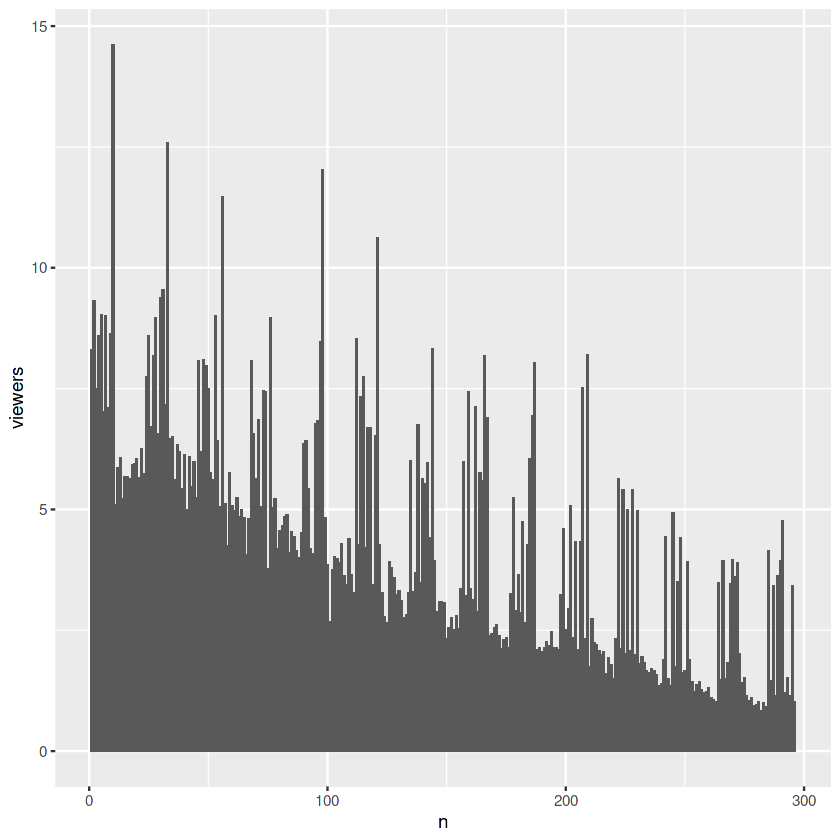

In [353]:
# parse simpsons
simpsons %>% html_elements("table.wikiepisodetable") %>% html_table %>% .[-6] %>% bind_rows %>% 
    select(Title, viewers=8) %>% mutate(viewers = parse_number(viewers), n = row_number()) %>% 
    ggplot(aes(x=n, y=viewers)) + geom_col()

## 🤔 Quiz

The episode with the largest number of viewers was **Once Upon a Time in Springfield**. Which episode of the Simpsons had the **smallest** number of viewers?


<ol style="list-style-type: upper-alpha;">
    <li>My Octopus and a Teacher</li>
    <li>Treehouse of Horror XXI</li>
    <li>Marge the Meanie</li>
    <li>The D'oh-cial Network</li>
    <li>The Devil Wears Nada</li>
</ol>



In [249]:
# smallest number of viewers

## IMDB top movies

Let's consider a well-known table: the [top 250 movies on IMDB](https://www.imdb.com/chart/top/).

In [354]:
imdb.250 <- read_html("https://www.imdb.com/chart/top/")

In [383]:
# parse imdb
imdbf %>% arrange(year) %>% mutate(top_rating = cummax(rating), king = rating == top_rating) %>% 
    filter(king) %>% mutate(delta = lead(year) - year)


title,year,rating,top_rating,king,delta
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
The Kid,1921,8.2,8.2,TRUE,6
Metropolis,1927,8.2,8.2,TRUE,4
City Lights,1931,8.4,8.4,TRUE,5
Modern Times,1936,8.4,8.4,TRUE,4
The Great Dictator,1940,8.4,8.4,TRUE,2
Casablanca,1942,8.5,8.5,TRUE,4
It's a Wonderful Life,1946,8.6,8.6,TRUE,8
Seven Samurai,1954,8.6,8.6,TRUE,3
12 Angry Men,1957,9.0,9.0,TRUE,15


## Exercise

"The Kid" came out in 1921 and has a rating of 8.2. Another movie that was rated at least as high didn't come out until 1927 (Metropolis), so we could say that The Kid reigned as the #1 film for six years. Metropolis reigned for four years until City Lights (rating 8.4) came out.

Which film reigned for the longest amount of time?

In [ ]:
# longest reign

## Super Bowl TV ratings
We just had the Super Bowl. How have the TV ratings for the Super Bowl changed over the years?

In [126]:
sbtv <- read_html('https://en.wikipedia.org/wiki/Super_Bowl_television_ratings') %>% html_elements('table') %>% .[[1]] %>% html_table

In [138]:
# viewers over time

How does this compare with other major sports?

- https://en.wikipedia.org/wiki/World_Series_television_ratings
- https://en.wikipedia.org/wiki/NBA_Finals_television_ratings

In [ ]:
# super bowl vs world series

## Scraping other types of web data

Here are some examples of other types of web data we can scrape:

### The UofM Stats department
Let's say I wanted to make a table of all the [undergraduate stats courses](https://lsa.umich.edu/stats/undergraduate-students/statistics-courses.html) offered by the department. 

In [148]:
stats <- read_html('https://lsa.umich.edu/stats/undergraduate-students/statistics-courses.html')

How should we extract the data from this web page? We notice from inspecting the page that each course title is a `<b>` (bold) element:

In [161]:
# extract statistics courses

### Reddit
Let's see how to scrape the [UofM Reddit site](https://old.reddit.com/r/uofm):

In [162]:
top.reddit <- read_html('https://old.reddit.com/r/uofm/top/?sort=top&t=all')

Let's plot the top scoring posts, when they were posted, and how many votes they have received.

In [121]:
# top posts on r/uofm